# Predictive Modeling for Tax_due Prediction Using Machine Learning.

## Name :Thasleema.k

## Organization : EntryElevate

## Submission date : 25/09/2024

## Table of content

### 1.Overview of Problem Statement

### 2.Objective

### 3.Data Collection

### 4.Data Description

### 5.Exploratory Data Analysis (EDA)

### 6.Data Preprocessing

### 7.Visualization

### 8.Feature Engineering

### 9.Data Splitting

### 10.Model Selection

### 11.Model Training & Evaluation

### 12.Feature Selection

### 13.Model Evaluation

### 14.Hyperparameter Tuning

### 15.Results

### 16.Model Deployment

### 17.Limitations

### 18.Conclusion

## 1. Overview of Problem Statement

### The problem statement can be summarized as follows:

* #### 1.Business Challenge:

#### Residential property owners need to understand the factors that significantly impact their tax. By accurately predicting the tax, they can make informed decisions regarding pricing and customer engagement.

* #### 2.Technical Challenge:

#### The real-estate dataset includes both numerical and categorical features, requiring appropriate preprocessing and feature engineering. Identifying the most relevant features that contribute to tax_due prediction. Developing and evaluating different machine learning models to find the best-performing one for predicting tax_due.

## 2. Objective

### To develop a predictive model that accurately forecasts the tax of residential property based on a variety of factors and other relevant attributes. The ultimate goal is to provide actionable insights that property owners can use to optimize their operations.

In [1]:
# Ignore warninggs
import warnings
warnings.filterwarnings('ignore')
#this code is used to supress warning messages.

## 3.Data Collection

In [2]:
# this code reads the dataset from csv file located at the specified path into a pandas dataframe named "df"
import pandas as pd
df=pd.read_csv("C:\\Users\\Faheem\\Downloads\\residential-property-tax-payments-from-2010-to-current-1.csv")
df

,YR,BILL_TYPE,BILL_NUM,PARCEL_ID,TXPR_NAME,CO_NAME,MAIL_ADDR,MAIL_ADDR2,CITY,STATE,ZIP1,ZIP2,PROP_LOC_NUM,PROP_LOC_NAME,LIEN_SOLD,BILLED,PAID,TAX_DUE
0,2010,Residential,12351,264169027,LYTTLETON PRISCILLA,LYTTLETON KEITHTOUS,297 BELLEVUE ST,NaN,HARTFORD,CT,6120,2104,303,BELLEVUE ST,NaN,891.34,62.18,829.16
1,2010,Residential,5621,142707053,CZARNECKI EUGENE B,NaN,809 NEW BRITAIN AV,NaN,HARTFORD,CT,6106,3918,809,NEW BRITAIN AV,Y,0.00,0.00,0.00
2,2010,Residential,19109,203423193,SOUTHERN NEW ENGLAND CONFERENC,NaN,PO Box 269,NaN,HARTFORD,CT,6141,0,156,RUSS ST,Y,1458.38,1458.38,0.00
3,2010,Residential,2671,284074072,BROWN DERMOTH H,NaN,3372 MAIN ST,NaN,HARTFORD,CT,6120,1109,3364,MAIN ST,NaN,2373.16,1916.40,456.76
4,2010,Residential,17625,221270024,ROSCOE THOMAS,NaN,228 DAVENTRY DR,NaN,DEBARY,FL,32713,2137,312,GARDEN ST,NaN,2381.56,2381.56,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136040,2017,Residential,25380,227544074,WASHINGTON DEVELOPERS LLC,NaN,5 MARINA VIEW DR,NaN,CHESTER,CT,6412,0,323-327,WASHINGTON ST,NaN,1216.06,0.00,1216.06
136041,2017,Residential,16312,147018080,CASTLEROCK 2017 LLC,NaN,333 WESTCHESTER AV WEST BUILDI,NaN,WHITE PLAINS,NY,10604,0,161,HAROLD ST,NaN,2592.94,0.00,2592.94
136042,2017,Residential,11083,193055038,IRVING VIOLET LOUISE,NaN,111 EAST 14TH STREET,c/o Mark Irving,NEW YORK,NY,10003,0,27,WOODSTOCK ST,NaN,2193.42,0.00,2193.42
136043,2017,Residential,25174,999999064,CROWN GARDENS,NaN,PROPERTY SERVICES INC,PO BOX 330487,WEST HARTFORD,CT,6133,0,26,ENFIELD ST,NaN,0.00,0.00,0.00


In [3]:
df.head()

,YR,BILL_TYPE,BILL_NUM,PARCEL_ID,TXPR_NAME,CO_NAME,MAIL_ADDR,MAIL_ADDR2,CITY,STATE,ZIP1,ZIP2,PROP_LOC_NUM,PROP_LOC_NAME,LIEN_SOLD,BILLED,PAID,TAX_DUE
0,2010,Residential,12351,264169027,LYTTLETON PRISCILLA,LYTTLETON KEITHTOUS,297 BELLEVUE ST,NaN,HARTFORD,CT,6120,2104,303,BELLEVUE ST,NaN,891.34,62.18,829.16
1,2010,Residential,5621,142707053,CZARNECKI EUGENE B,NaN,809 NEW BRITAIN AV,NaN,HARTFORD,CT,6106,3918,809,NEW BRITAIN AV,Y,0.00,0.00,0.00
2,2010,Residential,19109,203423193,SOUTHERN NEW ENGLAND CONFERENC,NaN,PO Box 269,NaN,HARTFORD,CT,6141,0,156,RUSS ST,Y,1458.38,1458.38,0.00
3,2010,Residential,2671,284074072,BROWN DERMOTH H,NaN,3372 MAIN ST,NaN,HARTFORD,CT,6120,1109,3364,MAIN ST,NaN,2373.16,1916.40,456.76
4,2010,Residential,17625,221270024,ROSCOE THOMAS,NaN,228 DAVENTRY DR,NaN,DEBARY,FL,32713,2137,312,GARDEN ST,NaN,2381.56,2381.56,0.00


In [4]:
df.tail()

,YR,BILL_TYPE,BILL_NUM,PARCEL_ID,TXPR_NAME,CO_NAME,MAIL_ADDR,MAIL_ADDR2,CITY,STATE,ZIP1,ZIP2,PROP_LOC_NUM,PROP_LOC_NAME,LIEN_SOLD,BILLED,PAID,TAX_DUE
136040,2017,Residential,25380,227544074,WASHINGTON DEVELOPERS LLC,NaN,5 MARINA VIEW DR,NaN,CHESTER,CT,6412,0,323-327,WASHINGTON ST,NaN,1216.06,0.0,1216.06
136041,2017,Residential,16312,147018080,CASTLEROCK 2017 LLC,NaN,333 WESTCHESTER AV WEST BUILDI,NaN,WHITE PLAINS,NY,10604,0,161,HAROLD ST,NaN,2592.94,0.0,2592.94
136042,2017,Residential,11083,193055038,IRVING VIOLET LOUISE,NaN,111 EAST 14TH STREET,c/o Mark Irving,NEW YORK,NY,10003,0,27,WOODSTOCK ST,NaN,2193.42,0.0,2193.42
136043,2017,Residential,25174,999999064,CROWN GARDENS,NaN,PROPERTY SERVICES INC,PO BOX 330487,WEST HARTFORD,CT,6133,0,26,ENFIELD ST,NaN,0.00,0.0,0.00
136044,2017,Residential,25486,227544084,WASHINGTON DEVELOPERS LLC,NaN,5 MARINA VIEW DR,NaN,CHESTER,CT,6412,0,333,WASHINGTON ST,NaN,1331.66,0.0,1331.66


## 4. Data Description

#### Data Source : https://data.world/datasets/free 

### The dataset consists of the following columns:
* YR: Year of the property tax payment, indicating the year for which the payment was recorded.
* BILL_TYPE: The type of bill(property tax)
* BILL_NUM: Bill number for each bill.
* PARCEL-ID: specific code assigned to each plot of land for taxation and record-keeping purposes. 
* TXPR_NAME: Taxpayer's name.
* CO_NAME: company name
* MAIL_ADDR: The mailing address associated with the taxpayer.
* MAIL_ADDR2: The mailing address associated with the taxpayer.
* CITY:  city of the taxpayer’s mailing address.
* STATE:  state of the taxpayer’s mailing address.
* ZIP1: zip code of the taxpayer’s mailing address 1.
* ZIP2: zip code of the taxpayer’s mailing address 2.
* PROP_LOC_NUM: Property location number
* LIEN_SOLD: indicates whether a tax lien on a property has been sold.(A tax lien is a legal claim by the government on a property when the property owner fails to pay the taxes owed.)
* BILLED: The amount billed for taxes.
* PAID: The amount paid by the taxpayer.
* TAX_DUE: The amount of tax owed.

#### Dataset Size:
* The total number of records:136045
*  Number of features: 18

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df

,YR,BILL_TYPE,BILL_NUM,PARCEL_ID,TXPR_NAME,CO_NAME,MAIL_ADDR,MAIL_ADDR2,CITY,STATE,ZIP1,ZIP2,PROP_LOC_NUM,PROP_LOC_NAME,LIEN_SOLD,BILLED,PAID,TAX_DUE
0,2010,Residential,12351,264169027,LYTTLETON PRISCILLA,LYTTLETON KEITHTOUS,297 BELLEVUE ST,NaN,HARTFORD,CT,6120,2104,303,BELLEVUE ST,NaN,891.34,62.18,829.16
1,2010,Residential,5621,142707053,CZARNECKI EUGENE B,NaN,809 NEW BRITAIN AV,NaN,HARTFORD,CT,6106,3918,809,NEW BRITAIN AV,Y,0.00,0.00,0.00
2,2010,Residential,19109,203423193,SOUTHERN NEW ENGLAND CONFERENC,NaN,PO Box 269,NaN,HARTFORD,CT,6141,0,156,RUSS ST,Y,1458.38,1458.38,0.00
3,2010,Residential,2671,284074072,BROWN DERMOTH H,NaN,3372 MAIN ST,NaN,HARTFORD,CT,6120,1109,3364,MAIN ST,NaN,2373.16,1916.40,456.76
4,2010,Residential,17625,221270024,ROSCOE THOMAS,NaN,228 DAVENTRY DR,NaN,DEBARY,FL,32713,2137,312,GARDEN ST,NaN,2381.56,2381.56,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136040,2017,Residential,25380,227544074,WASHINGTON DEVELOPERS LLC,NaN,5 MARINA VIEW DR,NaN,CHESTER,CT,6412,0,323-327,WASHINGTON ST,NaN,1216.06,0.00,1216.06
136041,2017,Residential,16312,147018080,CASTLEROCK 2017 LLC,NaN,333 WESTCHESTER AV WEST BUILDI,NaN,WHITE PLAINS,NY,10604,0,161,HAROLD ST,NaN,2592.94,0.00,2592.94
136042,2017,Residential,11083,193055038,IRVING VIOLET LOUISE,NaN,111 EAST 14TH STREET,c/o Mark Irving,NEW YORK,NY,10003,0,27,WOODSTOCK ST,NaN,2193.42,0.00,2193.42
136043,2017,Residential,25174,999999064,CROWN GARDENS,NaN,PROPERTY SERVICES INC,PO BOX 330487,WEST HARTFORD,CT,6133,0,26,ENFIELD ST,NaN,0.00,0.00,0.00


## 5.Exploratory Data Analysis

In [7]:
# To get the dimension of the dataset
df.shape

(136045, 18)

In [8]:
# To get the concise summary of a Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136045 entries, 0 to 136044
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   YR             136045 non-null  int64  
 1   BILL_TYPE      136045 non-null  object 
 2   BILL_NUM       136045 non-null  int64  
 3   PARCEL_ID      136045 non-null  int64  
 4   TXPR_NAME      136045 non-null  object 
 5   CO_NAME        34288 non-null   object 
 6   MAIL_ADDR      136040 non-null  object 
 7   MAIL_ADDR2     4900 non-null    object 
 8   CITY           136034 non-null  object 
 9   STATE          136010 non-null  object 
 10  ZIP1           136045 non-null  int64  
 11  ZIP2           136045 non-null  int64  
 12  PROP_LOC_NUM   135988 non-null  object 
 13  PROP_LOC_NAME  136044 non-null  object 
 14  LIEN_SOLD      3429 non-null    object 
 15  BILLED         136045 non-null  float64
 16  PAID           136045 non-null  float64
 17  TAX_DUE        136045 non-nul

In [9]:
# columns
df.columns

Index(['YR', 'BILL_TYPE', 'BILL_NUM', 'PARCEL_ID', 'TXPR_NAME', 'CO_NAME',
       'MAIL_ADDR', 'MAIL_ADDR2', 'CITY', 'STATE', 'ZIP1', 'ZIP2',
       'PROP_LOC_NUM', 'PROP_LOC_NAME', 'LIEN_SOLD', 'BILLED', 'PAID',
       'TAX_DUE'],
      dtype='object')

In [10]:
# Data types of each columns in the dataframe
df.dtypes

YR                 int64
BILL_TYPE         object
BILL_NUM           int64
PARCEL_ID          int64
TXPR_NAME         object
CO_NAME           object
MAIL_ADDR         object
MAIL_ADDR2        object
CITY              object
STATE             object
ZIP1               int64
ZIP2               int64
PROP_LOC_NUM      object
PROP_LOC_NAME     object
LIEN_SOLD         object
BILLED           float64
PAID             float64
TAX_DUE          float64
dtype: object

### Identifying numerical and categorical columns

In [11]:
# Selecting all numeric columns (both integers and floats)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Numeric Columns (including both integers and floats):")
print(num_cols)

Numeric Columns (including both integers and floats):
Index(['YR', 'BILL_NUM', 'PARCEL_ID', 'ZIP1', 'ZIP2', 'BILLED', 'PAID',
       'TAX_DUE'],
      dtype='object')


In [12]:
# Categorical columns
cat_cols = df.select_dtypes(include=['object','datetime']).columns
print(cat_cols)

Index(['BILL_TYPE', 'TXPR_NAME', 'CO_NAME', 'MAIL_ADDR', 'MAIL_ADDR2', 'CITY',
       'STATE', 'PROP_LOC_NUM', 'PROP_LOC_NAME', 'LIEN_SOLD'],
      dtype='object')


In [13]:
# finding missing /null values
df.isnull().sum()

YR                    0
BILL_TYPE             0
BILL_NUM              0
PARCEL_ID             0
TXPR_NAME             0
CO_NAME          101757
MAIL_ADDR             5
MAIL_ADDR2       131145
CITY                 11
STATE                35
ZIP1                  0
ZIP2                  0
PROP_LOC_NUM         57
PROP_LOC_NAME         1
LIEN_SOLD        132616
BILLED                0
PAID                  0
TAX_DUE               0
dtype: int64

### Out of 18 columns, 8 are numerical and 10 are categorical

In [14]:
# percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

YR                0.000000
BILL_TYPE         0.000000
BILL_NUM          0.000000
PARCEL_ID         0.000000
TXPR_NAME         0.000000
CO_NAME          74.796575
MAIL_ADDR         0.003675
MAIL_ADDR2       96.398251
CITY              0.008086
STATE             0.025727
ZIP1              0.000000
ZIP2              0.000000
PROP_LOC_NUM      0.041898
PROP_LOC_NAME     0.000735
LIEN_SOLD        97.479510
BILLED            0.000000
PAID              0.000000
TAX_DUE           0.000000
dtype: float64

#### if percentage of missing values is greater than 50%, we can drop that columns

#### The columns "CO_NAME","MAIL_ADDR2", "LIEN_SOLD" contain almost missing values, so that those can be droped from the dataset.

In [15]:
#Check the number of NaN values in the TAX_DUE column.
nan_count = df['TAX_DUE'].isna().sum()
print(f'Total NaN values in TAX_DUE: {nan_count}')

Total NaN values in TAX_DUE: 0


In [16]:
#finding duplicates
df.duplicated().sum()

0

### There are no duplicate values

## Understand the distribution of data

In [17]:
# Statistical summary of numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YR,136045.0,2.014496e+03,1.777353e+00,2010.0,2.013000e+03,2.015000e+03,2.016000e+03,2.017000e+03
BILL_NUM,136045.0,2.076556e+04,3.777817e+04,1.0,6.769000e+03,1.350100e+04,2.024000e+04,1.000003e+06
PARCEL_ID,136045.0,2.012499e+08,5.487155e+07,102001001.0,1.625051e+08,1.982081e+08,2.442881e+08,9.999992e+08
ZIP1,136045.0,7.579930e+03,8.480252e+03,0.0,6.106000e+03,6.112000e+03,6.114000e+03,9.840900e+04
ZIP2,136045.0,1.401709e+03,1.565618e+03,-530.0,0.000000e+00,1.126000e+03,2.418000e+03,9.792000e+03
BILLED,136045.0,8.536565e+03,7.707653e+04,-3681.8,2.067500e+03,3.295220e+03,4.444480e+03,5.473181e+06
PAID,136045.0,7.845229e+03,7.155735e+04,-3661.0,1.622560e+03,3.129920e+03,4.264100e+03,5.469784e+06
TAX_DUE,136045.0,6.913355e+02,1.633742e+04,-238900.5,0.000000e+00,0.000000e+00,0.000000e+00,2.593094e+06


In [18]:
# statistical summary of  categorical columns 
df.describe(include='object').T

,count,unique,top,freq
BILL_TYPE,136045,1,Residential,136045
TXPR_NAME,136045,22180,BUSHNELL CONDOS LLC,1459
CO_NAME,34288,6791,MAGALHAES ROSA,90
MAIL_ADDR,136040,20052,621 FARMINGTON AV,2711
MAIL_ADDR2,4900,772,C/O NAFTALI STEINMETZ,324
CITY,136034,863,HARTFORD,96529
STATE,136010,55,CT,122033
PROP_LOC_NUM,135988,1584,100,3208
PROP_LOC_NAME,136044,3995,MAIN ST,2008
LIEN_SOLD,3429,1,Y,3429


### Finding Outliers

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
# Calculate Z-scores for numerical columns
z_scores = df[num_cols].apply(zscore)

# Define threshold for outliers (typically |Z-score| > 3)
threshold = 3

# Boolean array where True indicates presence of outliers
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Select rows containing outliers
outliers_df = df[outliers]

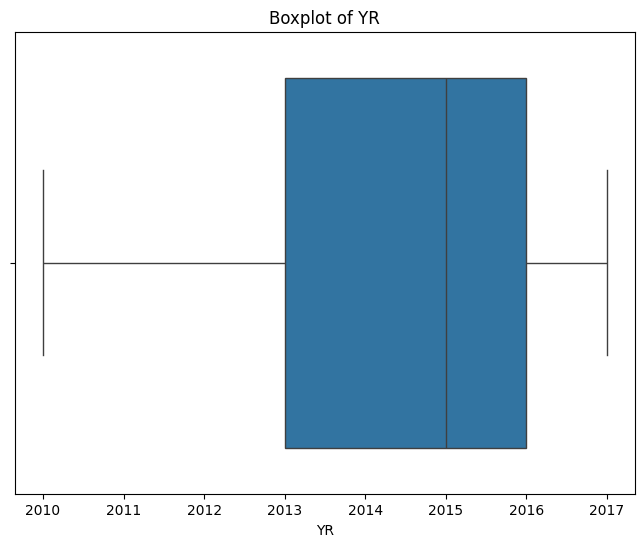

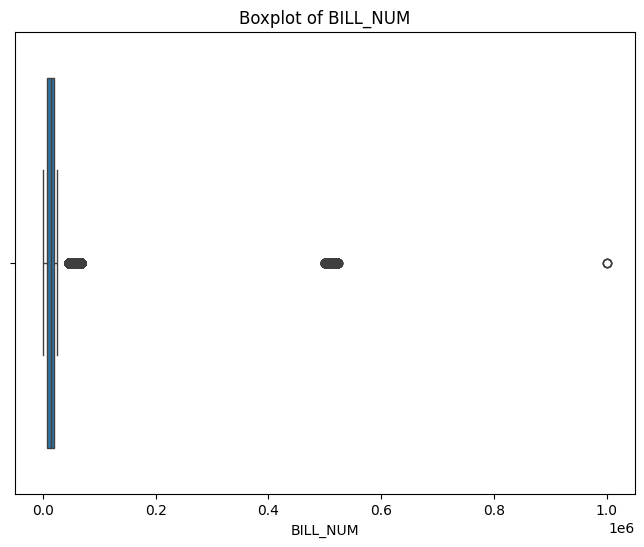

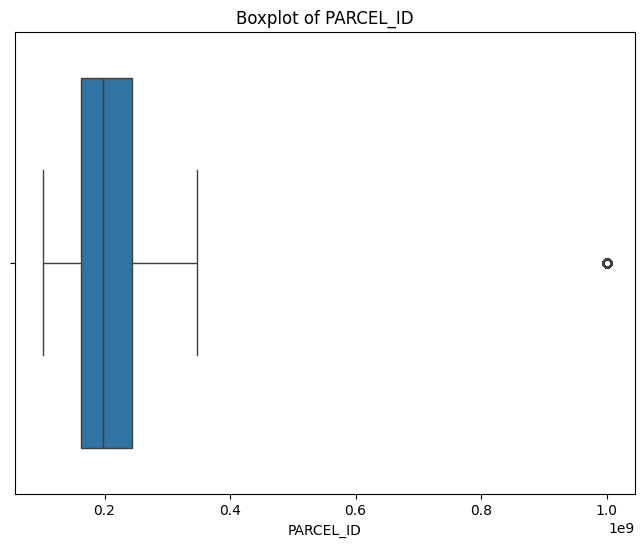

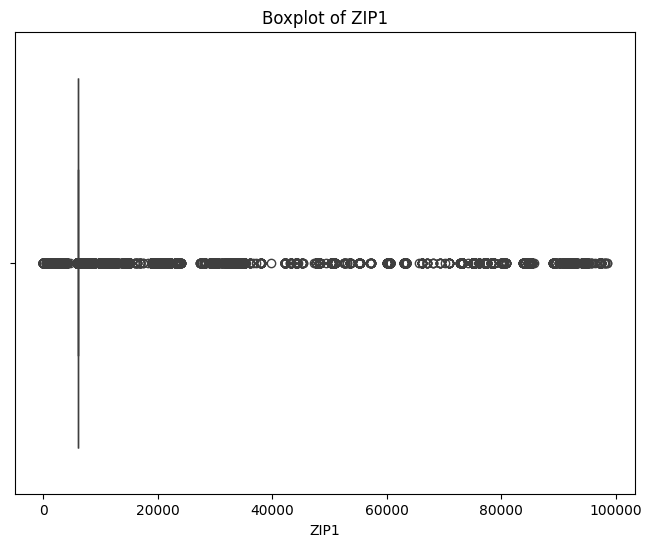

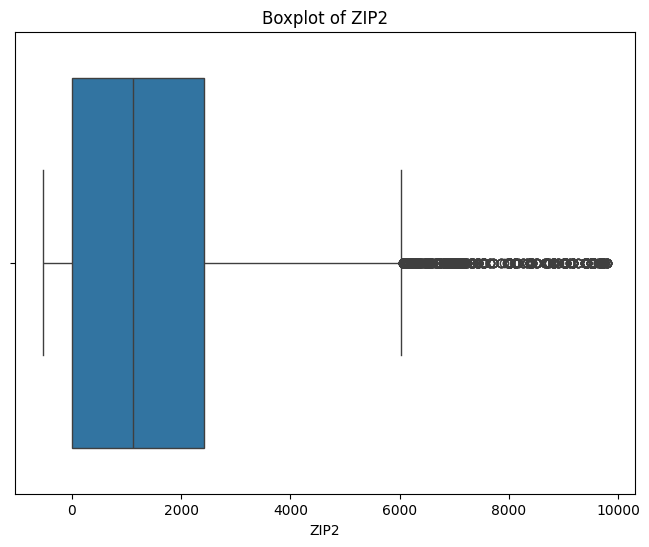

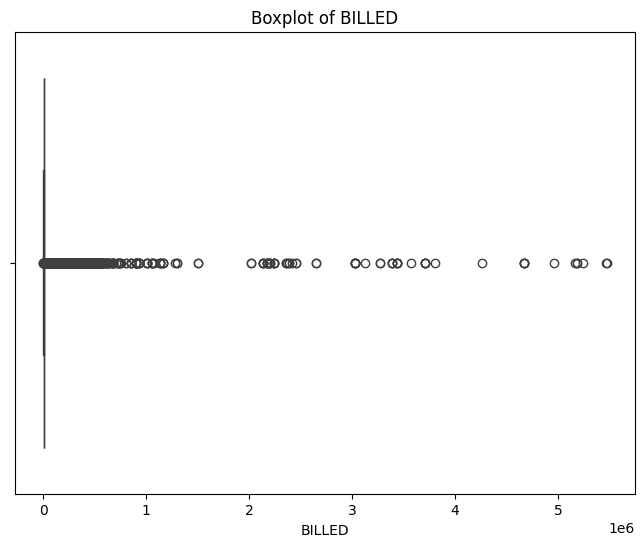

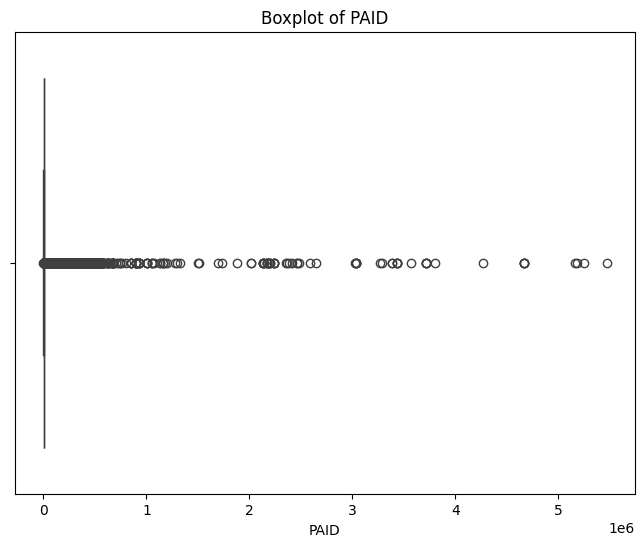

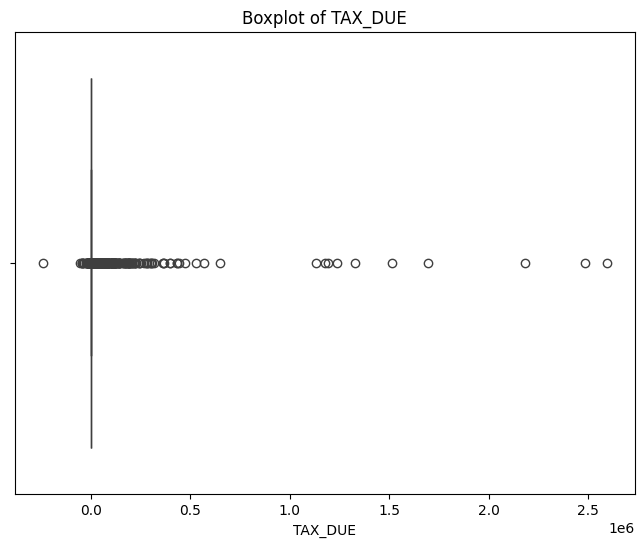

In [20]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

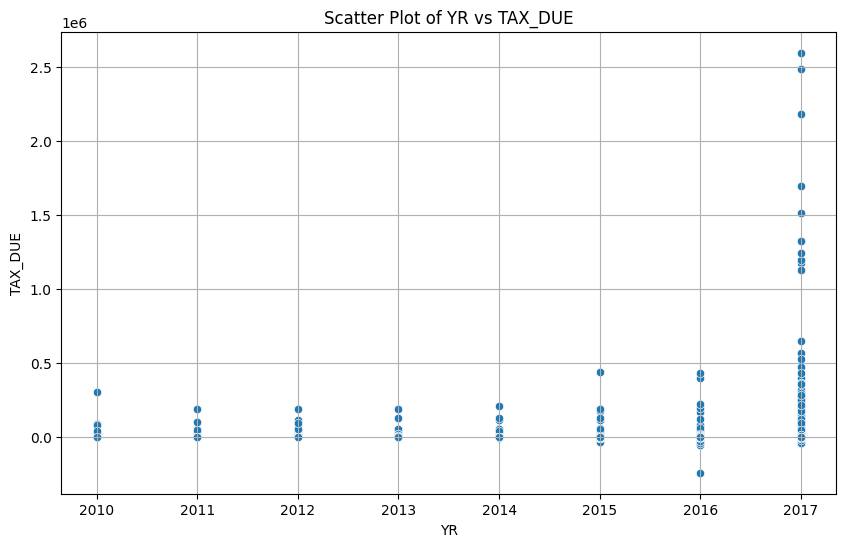

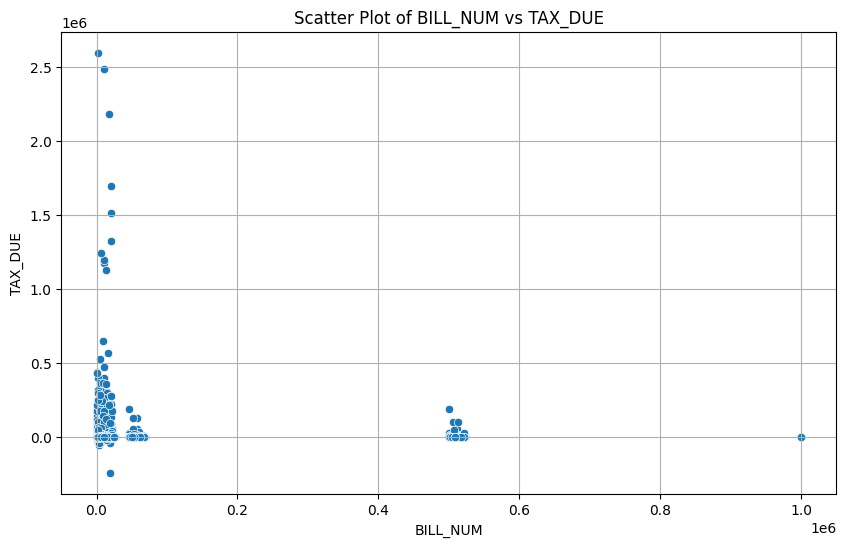

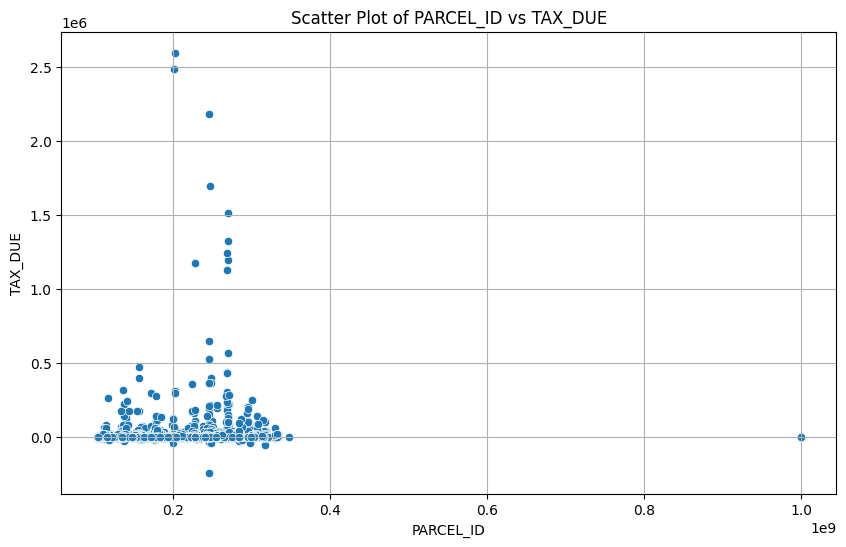

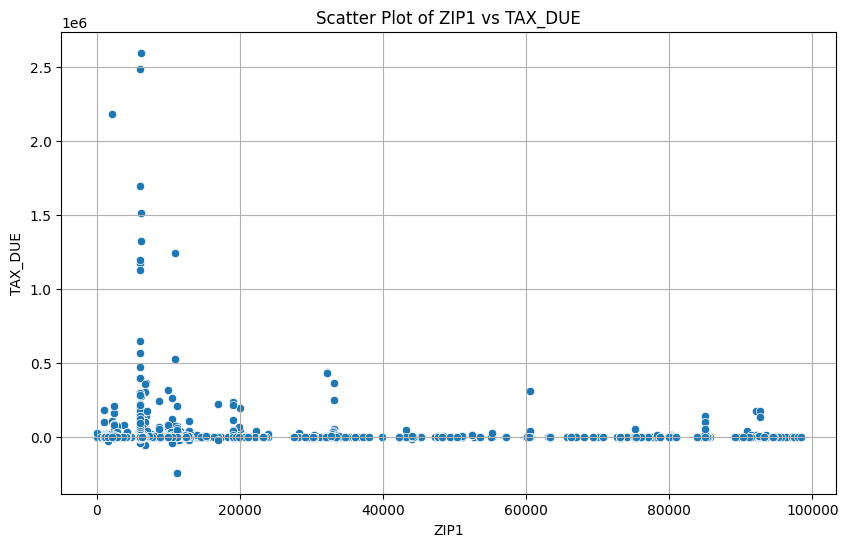

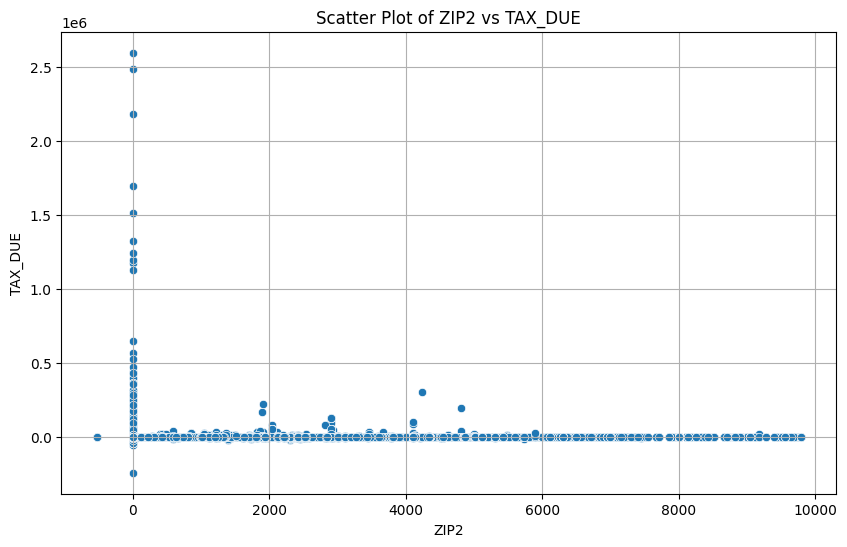

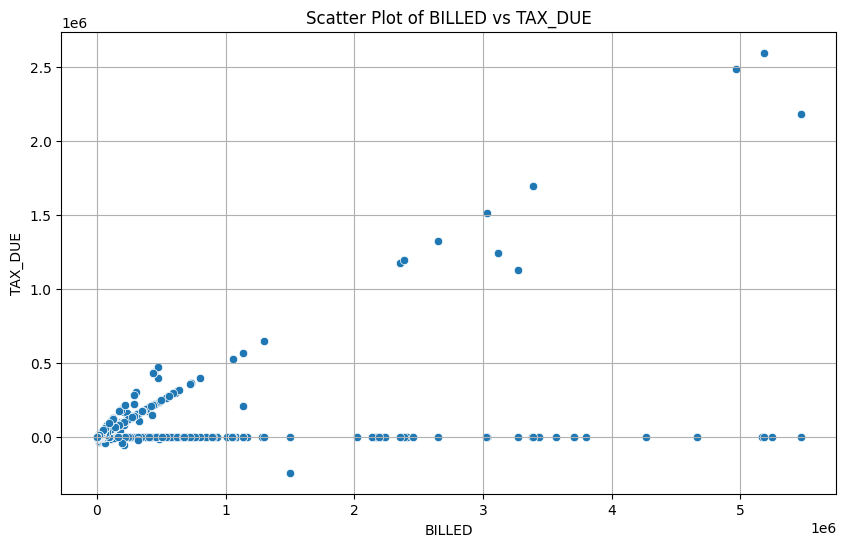

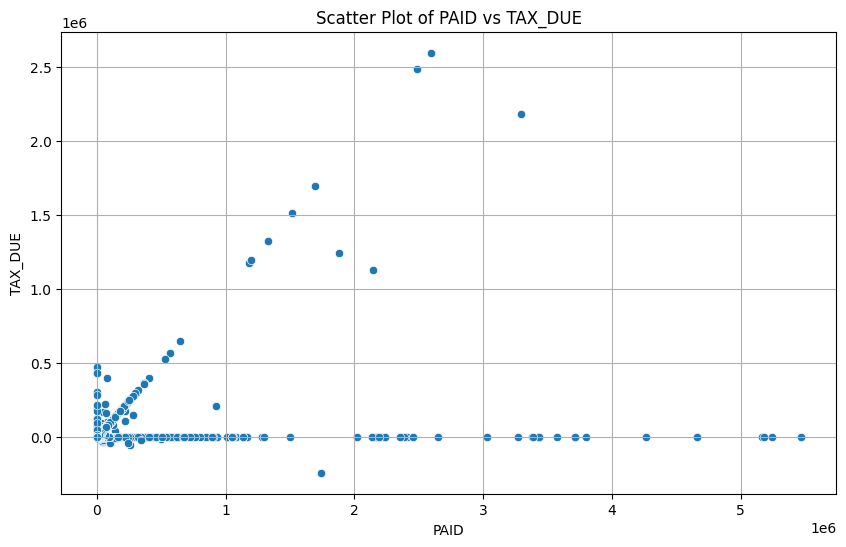

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns from the DataFrame
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Loop through each numerical column and create scatter plots against 'TAX_DUE'
for col in num_cols:
    if col != 'TAX_DUE':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=col, y='TAX_DUE', data=df)
        plt.title(f'Scatter Plot of {col} vs TAX_DUE')
        plt.xlabel(col)
        plt.ylabel('TAX_DUE')
        plt.grid(True)
        plt.show()

### Skewness and Kurtosis

In [22]:
from scipy.stats import skew, kurtosis

#claculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurt = df[num_cols].apply(lambda x: kurtosis(x,fisher=False))

print(skewness)
print(kurt)

#Identify positive and negative skewness (absolute value>1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('variable with positive skewness (skew > 1):\n', positive_skewness)
print('variable with negative skewness (skew < -1):\n', negative_skewness)

# Identify the platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

YR            -0.109095
BILL_NUM      10.374518
PARCEL_ID      3.837283
ZIP1           7.743395
ZIP2           1.018305
BILLED        43.866513
PAID          44.622972
TAX_DUE      104.879384
dtype: float64
YR               1.873613
BILL_NUM       138.391182
PARCEL_ID       56.904924
ZIP1            67.557507
ZIP2             3.953684
BILLED        2330.953121
PAID          2438.336953
TAX_DUE      13516.229573
dtype: float64
variable with positive skewness (skew > 1):
 BILL_NUM      10.374518
PARCEL_ID      3.837283
ZIP1           7.743395
ZIP2           1.018305
BILLED        43.866513
PAID          44.622972
TAX_DUE      104.879384
dtype: float64
variable with negative skewness (skew < -1):
 Series([], dtype: float64)
variables with platykurtic distribution (kurtosis < 3):
 YR    1.873613
dtype: float64
variables with leptokurtic distribution (kurtosis > 3):
 BILL_NUM       138.391182
PARCEL_ID       56.904924
ZIP1            67.557507
ZIP2             3.953684
BILLED        2330.95

#### The target variable'TAX_DUE' is almost constant (i.e., most values are '0'), skewness and kurtosis might result in NaN or very high values

### Skewness:
 * Positive Skewness: 'BILL_NUM','PARCEL_ID','ZIP1','ZIP2','BILLED','PAID','TAX_DUE' have positive skewness, indicating a longer right tail.
 * Negative Skewness: None of the variables have significant negative skewness. tail.

### Kurtosis:
* Platykurtic Distribution:variable 'YR' have a flatter distribution (kurtosis < 3).
* Leptokurtic Distribution: 'BILL_NUM','PARCEL_ID','ZIP1','ZIP2','BILLED','PAID','TAX_DUE' have a sharper peak and heavier tails (kurtosis > 3). > 3).

### Implications for Model Building:
* Positive Skewness: 'BILL_NUM','PARCEL_ID','ZIP1','ZIP2','BILLED','PAID','TAX_DUE'  may need transformation to reduce skewness for better model performance.
* Platykurtic Variables: variable 'YR' have flatter distribution, indicating outlier influence.
* Leptokurtic Variables:'BILL_NUM','PARCEL_ID','ZIP1','ZIP2','BILLED','PAID','TAX_DUE' have sharper peaks and heavier tails, which may affect model sensitivity to  outliers.

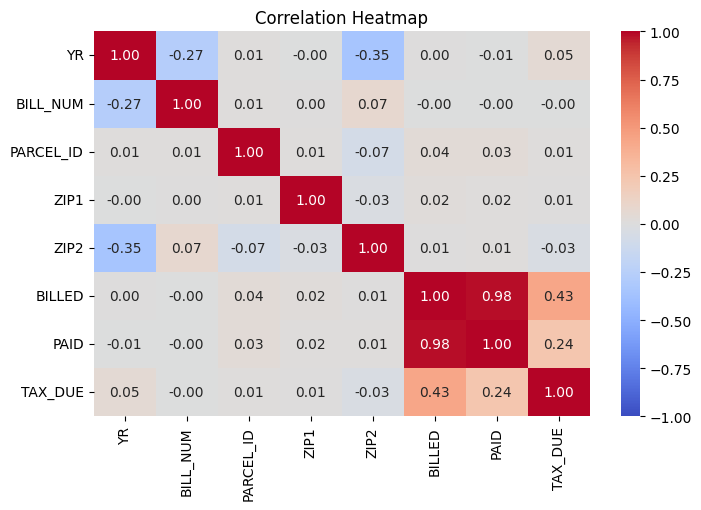

In [23]:
# Correlation heatmap
# Assuming df is our DataFrame as provided
# Drop non-numeric columns before computing correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### insights:The heatmap provides a visual representation of the correlations between different numerical features in my dataset. Here are some key insights:

### 1.Positive Correlation with TAX_DUE:
* BILLED(0.43),PAID(0.24): These are the 2 columns that positively correlate with TAX_DUE

### 2.Multicollinearity:
* PAID and BILLED(0.98): These two features are highly correlated, suggesting multicollinearity.
* Drop Recommendation:Given the high correlation (0.98) between PAID and BILLED,I can drop both features to reduce multicollinearity.

### Analysing Categorical columns

In [24]:
for col in cat_cols:
    print(f"Values in {col}:\n{df[col].unique()}")
    print(f"Number of unique values in {col}: {df[col].nunique()}\n")

Values in BILL_TYPE:
['Residential']
Number of unique values in BILL_TYPE: 1

Values in TXPR_NAME:
['LYTTLETON PRISCILLA' 'CZARNECKI EUGENE B'
 'SOUTHERN NEW ENGLAND CONFERENC' ... 'FRANKLIN GARDENS' 'SOUTH PLACE'
 'LAUREL ST CONDOS']
Number of unique values in TXPR_NAME: 22180

Values in CO_NAME:
['LYTTLETON KEITHTOUS' nan 'HAYNES EUGENE JR ESTATE' ...
 'C/O CAPSTONE MGMT' 'C/O ADVANCE PROPERTY MANAGEMEN' 'C/O JOHN F LEE']
Number of unique values in CO_NAME: 6791

Values in MAIL_ADDR:
['297 BELLEVUE ST' '809 NEW BRITAIN AV' 'PO Box 269' ... '145 GEORGE ST'
 '362 LAUREL ST' 'PROPERTY SERVICES INC']
Number of unique values in MAIL_ADDR: 20052

Values in MAIL_ADDR2:
[nan 'C/O VESPASIAN  LLC' '95 NILES STREET' 'DBA HAVANA GROUP'
 '7 CLEVELAND AV UNIT 0102' 'Apt.G-1' '433 SO MAIN ST SUITE 328'
 'AIMCO/TTA MS 235' 'PO BOX 53' '101 N. TRYON STREET' 'C/O CAPSTONE MGMT.'
 'c/o ZGS COMMUNICATIONS' 'APT 2132' 'C/O ORL PROPERTY MANAGEMENT'
 'c/o American Home Mortgage Ser' 'C/O SUMMIT MEDICAL'
 '

### cross tabulation TAX_DUE across the STATE column

In [25]:
pd.crosstab(["TAX_DUE"],df["STATE"],margins=True)

STATE,AL,AP,AR,AZ,CA,CN,CO,CT,DC,DE,...,UK,US,UT,VA,VI,WA,WI,ct,ny,All
row_0,,,,,,,,,,,,,,,,,,,,,
TAX_DUE,28,1,7,102,392,14,103,122033,27,36,...,6,1,43,144,3,6,27,2,1,136010
All,28,1,7,102,392,14,103,122033,27,36,...,6,1,43,144,3,6,27,2,1,136010


* #### The dataset contains records for 56 unique states or regions.
* #### The All row gives the total count of records for each state (which is identical to the counts in the TAX_DUE row, implying that every record in the dataset has taxes due).
* #### For example:
#### AL (Alabama): 28 records, all with taxes due.
#### CT (Connecticut): 122,033 records, all with taxes due.
#### CA (California): 392 records, all with taxes due.
#### Other states like UK, US, VI, etc., also have smaller counts.
#### The final column ('All') shows a total of 136,010 records, and all of them have taxes due.

## 6. Data Preprocessing

In [28]:
#this code creates a copy of the orginal dataframe and assigns it to a new variable "df1" for the further purpose.
df1 = df2.copy()
df1.shape

(31290, 18)

In [29]:
df1.columns

Index(['YR', 'BILL_TYPE', 'BILL_NUM', 'PARCEL_ID', 'TXPR_NAME', 'CO_NAME',
       'MAIL_ADDR', 'MAIL_ADDR2', 'CITY', 'STATE', 'ZIP1', 'ZIP2',
       'PROP_LOC_NUM', 'PROP_LOC_NAME', 'LIEN_SOLD', 'BILLED', 'PAID',
       'TAX_DUE'],
      dtype='object')

### Remove unnecessary columns:

#### The columns "CO_NAME","MAIL_ADDR2", "LIEN_SOLD" contain almost missing values. The properties are residential, so we know that the column specifies the type of bill of all properties are residential. so that those columns can be droped from the dataset.

In [30]:
# Drop the specified columns
df1.drop(['BILL_TYPE','CO_NAME','MAIL_ADDR2','ZIP2','LIEN_SOLD'],axis=1,inplace=True)

In [31]:
# column with multicollinearity
# Drop 'PAID' column
df1.drop(columns=['PAID'], inplace=True)

### Handling missing values

In [32]:
#Fill missing categorical values with the column's mode
df1.fillna(df1.mode().iloc[0], inplace=True)

In [33]:
# Step 1: Convert to numeric (coercing errors to NaN)
df1['PROP_LOC_NUM'] = pd.to_numeric(df1['PROP_LOC_NUM'], errors='coerce')

# Step 2: Check for missing or problematic entries
missing_values = df1[df1['PROP_LOC_NUM'].isna()]

# Step 3: Handle missing or non-numeric values (e.g., drop or fill them)
df1['PROP_LOC_NUM'].fillna(df1['PROP_LOC_NUM'].mean(), inplace=True)  # Example: filling NaNs with mean

# Step 4: Convert to integer type if appropriate
df1['PROP_LOC_NUM'] = df1['PROP_LOC_NUM'].astype(int)

In [34]:
df1.to_csv('cleaned_residential_property_tax.csv', index=False)

In [35]:
# finding missing /null values
df1.isnull().sum()

YR               0
BILL_NUM         0
PARCEL_ID        0
TXPR_NAME        0
MAIL_ADDR        0
CITY             0
STATE            0
ZIP1             0
PROP_LOC_NUM     0
PROP_LOC_NAME    0
BILLED           0
TAX_DUE          0
dtype: int64

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31290 entries, 0 to 136044
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YR             31290 non-null  int64  
 1   BILL_NUM       31290 non-null  int64  
 2   PARCEL_ID      31290 non-null  int64  
 3   TXPR_NAME      31290 non-null  object 
 4   MAIL_ADDR      31290 non-null  object 
 5   CITY           31290 non-null  object 
 6   STATE          31290 non-null  object 
 7   ZIP1           31290 non-null  int64  
 8   PROP_LOC_NUM   31290 non-null  int32  
 9   PROP_LOC_NAME  31290 non-null  object 
 10  BILLED         31290 non-null  float64
 11  TAX_DUE        31290 non-null  float64
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 3.0+ MB


### Handling Outliers

#### Here IQR method is used for outlier treatement

In [37]:
# IQR method for outlier detection in 'TAX_DUE'
Q1 = df['TAX_DUE'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['TAX_DUE'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                      # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'TAX_DUE'
outliers_iqr = df1[(df1['TAX_DUE'] < lower_bound) | (df1['TAX_DUE'] > upper_bound)]

# Print outliers in 'TAX_DUE'
print(outliers_iqr)

          YR  BILL_NUM  PARCEL_ID                   TXPR_NAME  \
0       2010     12351  264169027         LYTTLETON PRISCILLA   
3       2010      2671  284074072             BROWN DERMOTH H   
10      2010     20736  170029174               TURNER JOHN G   
11      2010     15616  240119104                  PEAY NAOMI   
15      2010     13822  219211011  MIDDLEFIELD PROPERTIES LLC   
...      ...       ...        ...                         ...   
136039  2017      6958  171094057             DAVIS DEBORAH C   
136040  2017     25380  227544074   WASHINGTON DEVELOPERS LLC   
136041  2017     16312  147018080         CASTLEROCK 2017 LLC   
136042  2017     11083  193055038        IRVING VIOLET LOUISE   
136044  2017     25486  227544084   WASHINGTON DEVELOPERS LLC   

                             MAIL_ADDR          CITY STATE   ZIP1  \
0                      297 BELLEVUE ST      HARTFORD    CT   6120   
3                         3372 MAIN ST      HARTFORD    CT   6120   
10          

In [38]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    return lw,uw

In [39]:
lw, uw = whisker(df1['BILLED'])
print(f'Lower whisker: {lw}, Upper whisker:{uw}')

Lower whisker: -3077.8699999999994, Upper whisker:9098.849999999999


#### Since the lower whisker is negative (and the column 'BILLED' represent payment, which is usually positive), the lower whisker doesn’t make much practical sense for this type of data. It suggests there are no meaningful lower outliers.

In [40]:
for i in df1.select_dtypes(include = 'number').columns:
    lw,uw = whisker(df1[i])
    df1[i] = np.where(df1[i] < lw,lw,df1[i])
    df1[i] = np.where(df1[i] > uw,uw,df1[i])

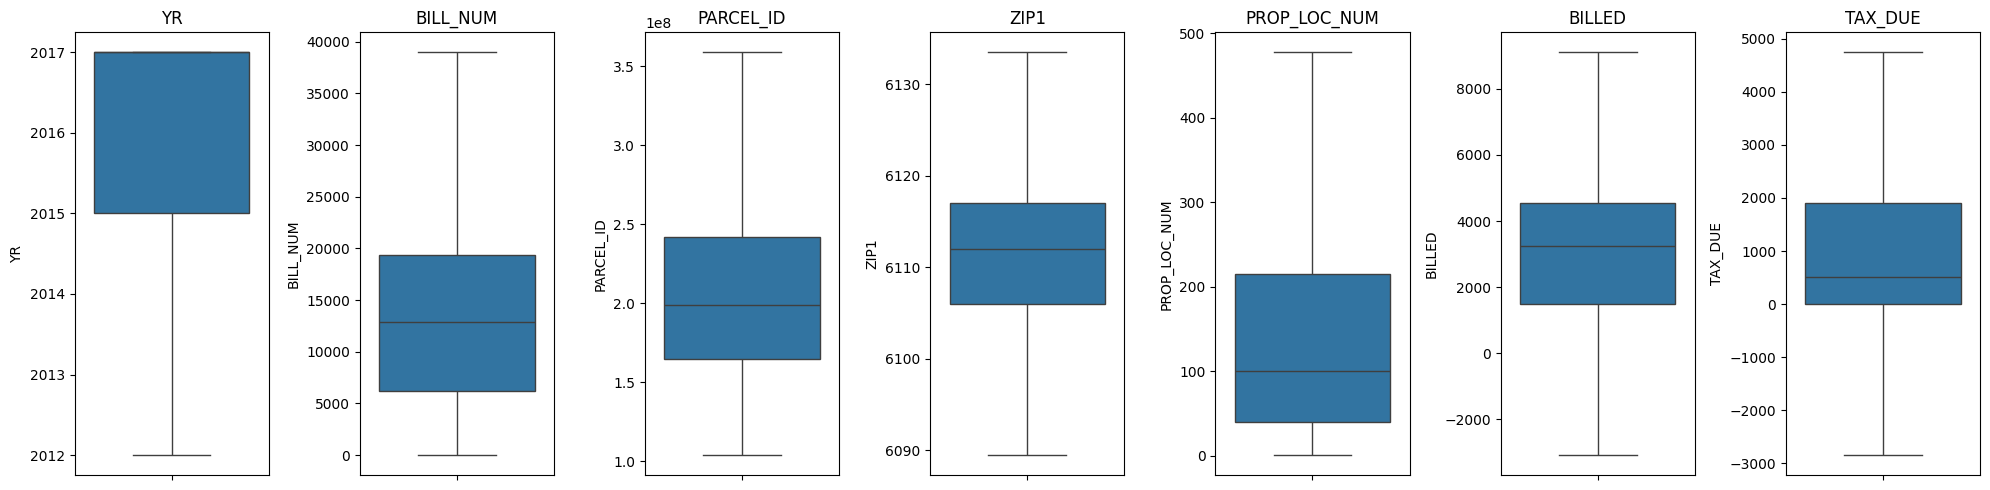

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))  # Adjust the figure size as needed
numeric_columns = df1.select_dtypes(include='number').columns

for i, col in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i + 1)  # Adjust subplot arrangement dynamically
    sns.boxplot(y=df1[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### All Outliers are removed

## 7. Visualization

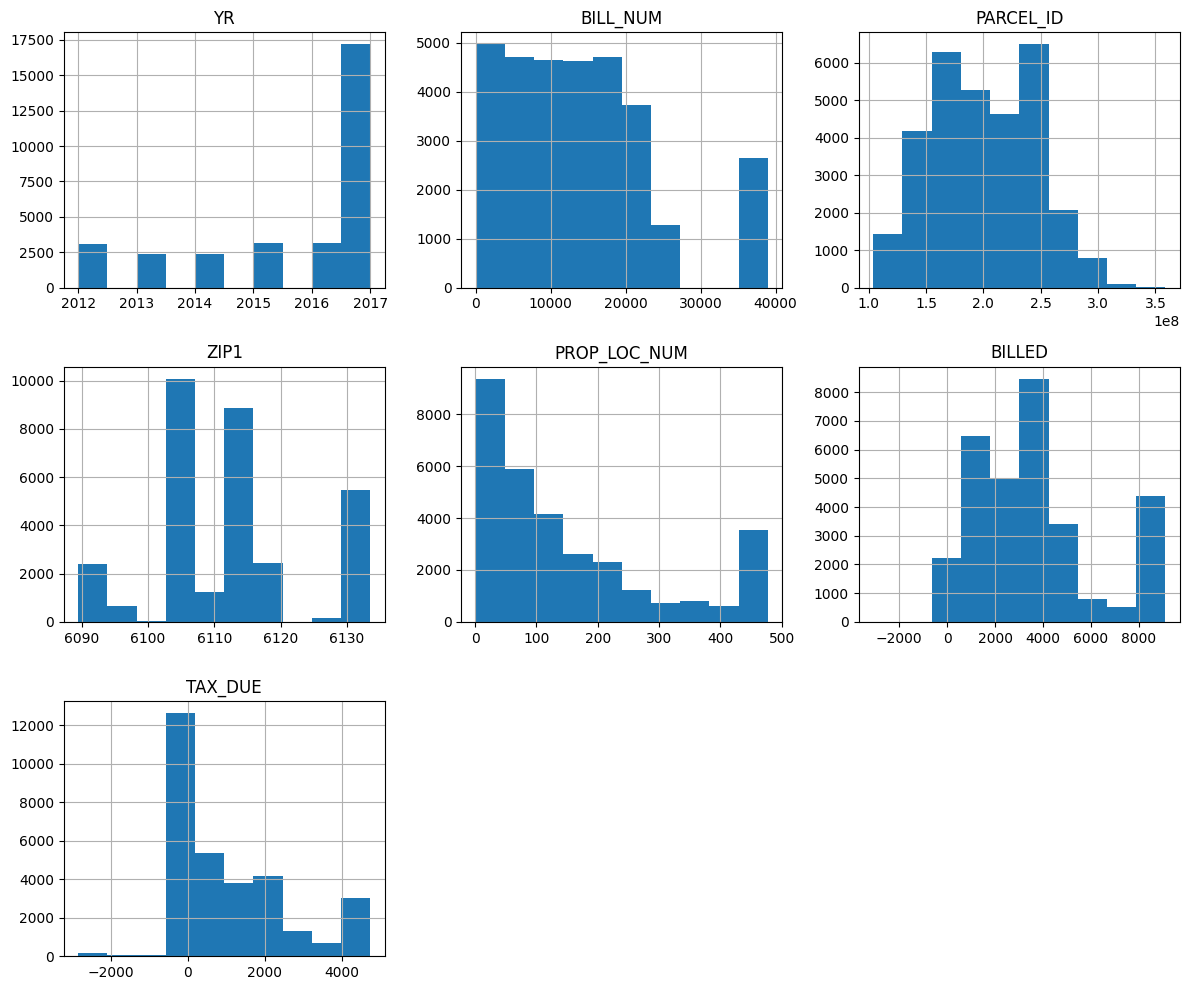

In [42]:
# Histograms for numerical columns after outlier treatment
# Histograms and Distribution Plots
df1.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

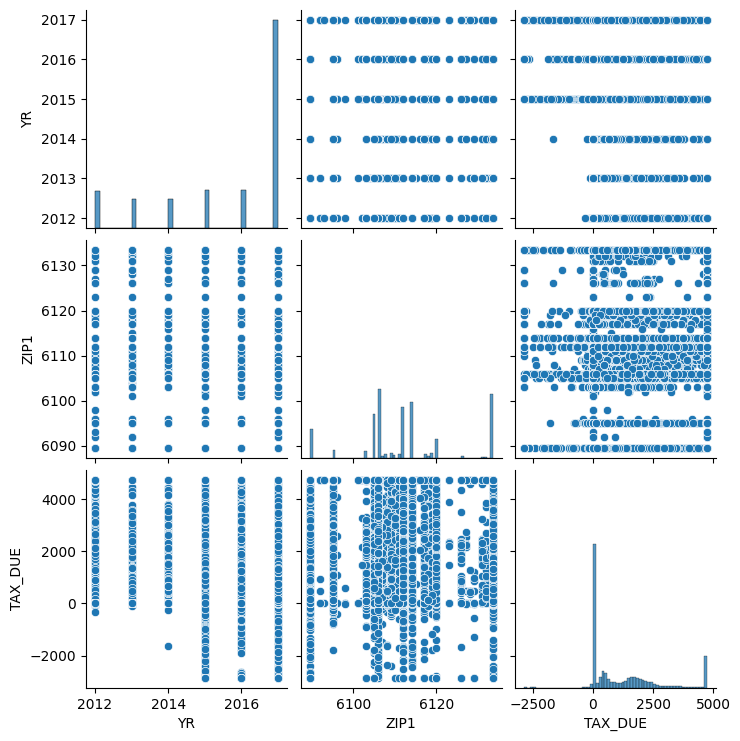

In [43]:
# Scatter Plots
sns.pairplot(df1, vars=['YR','ZIP1','TAX_DUE'])
plt.show()

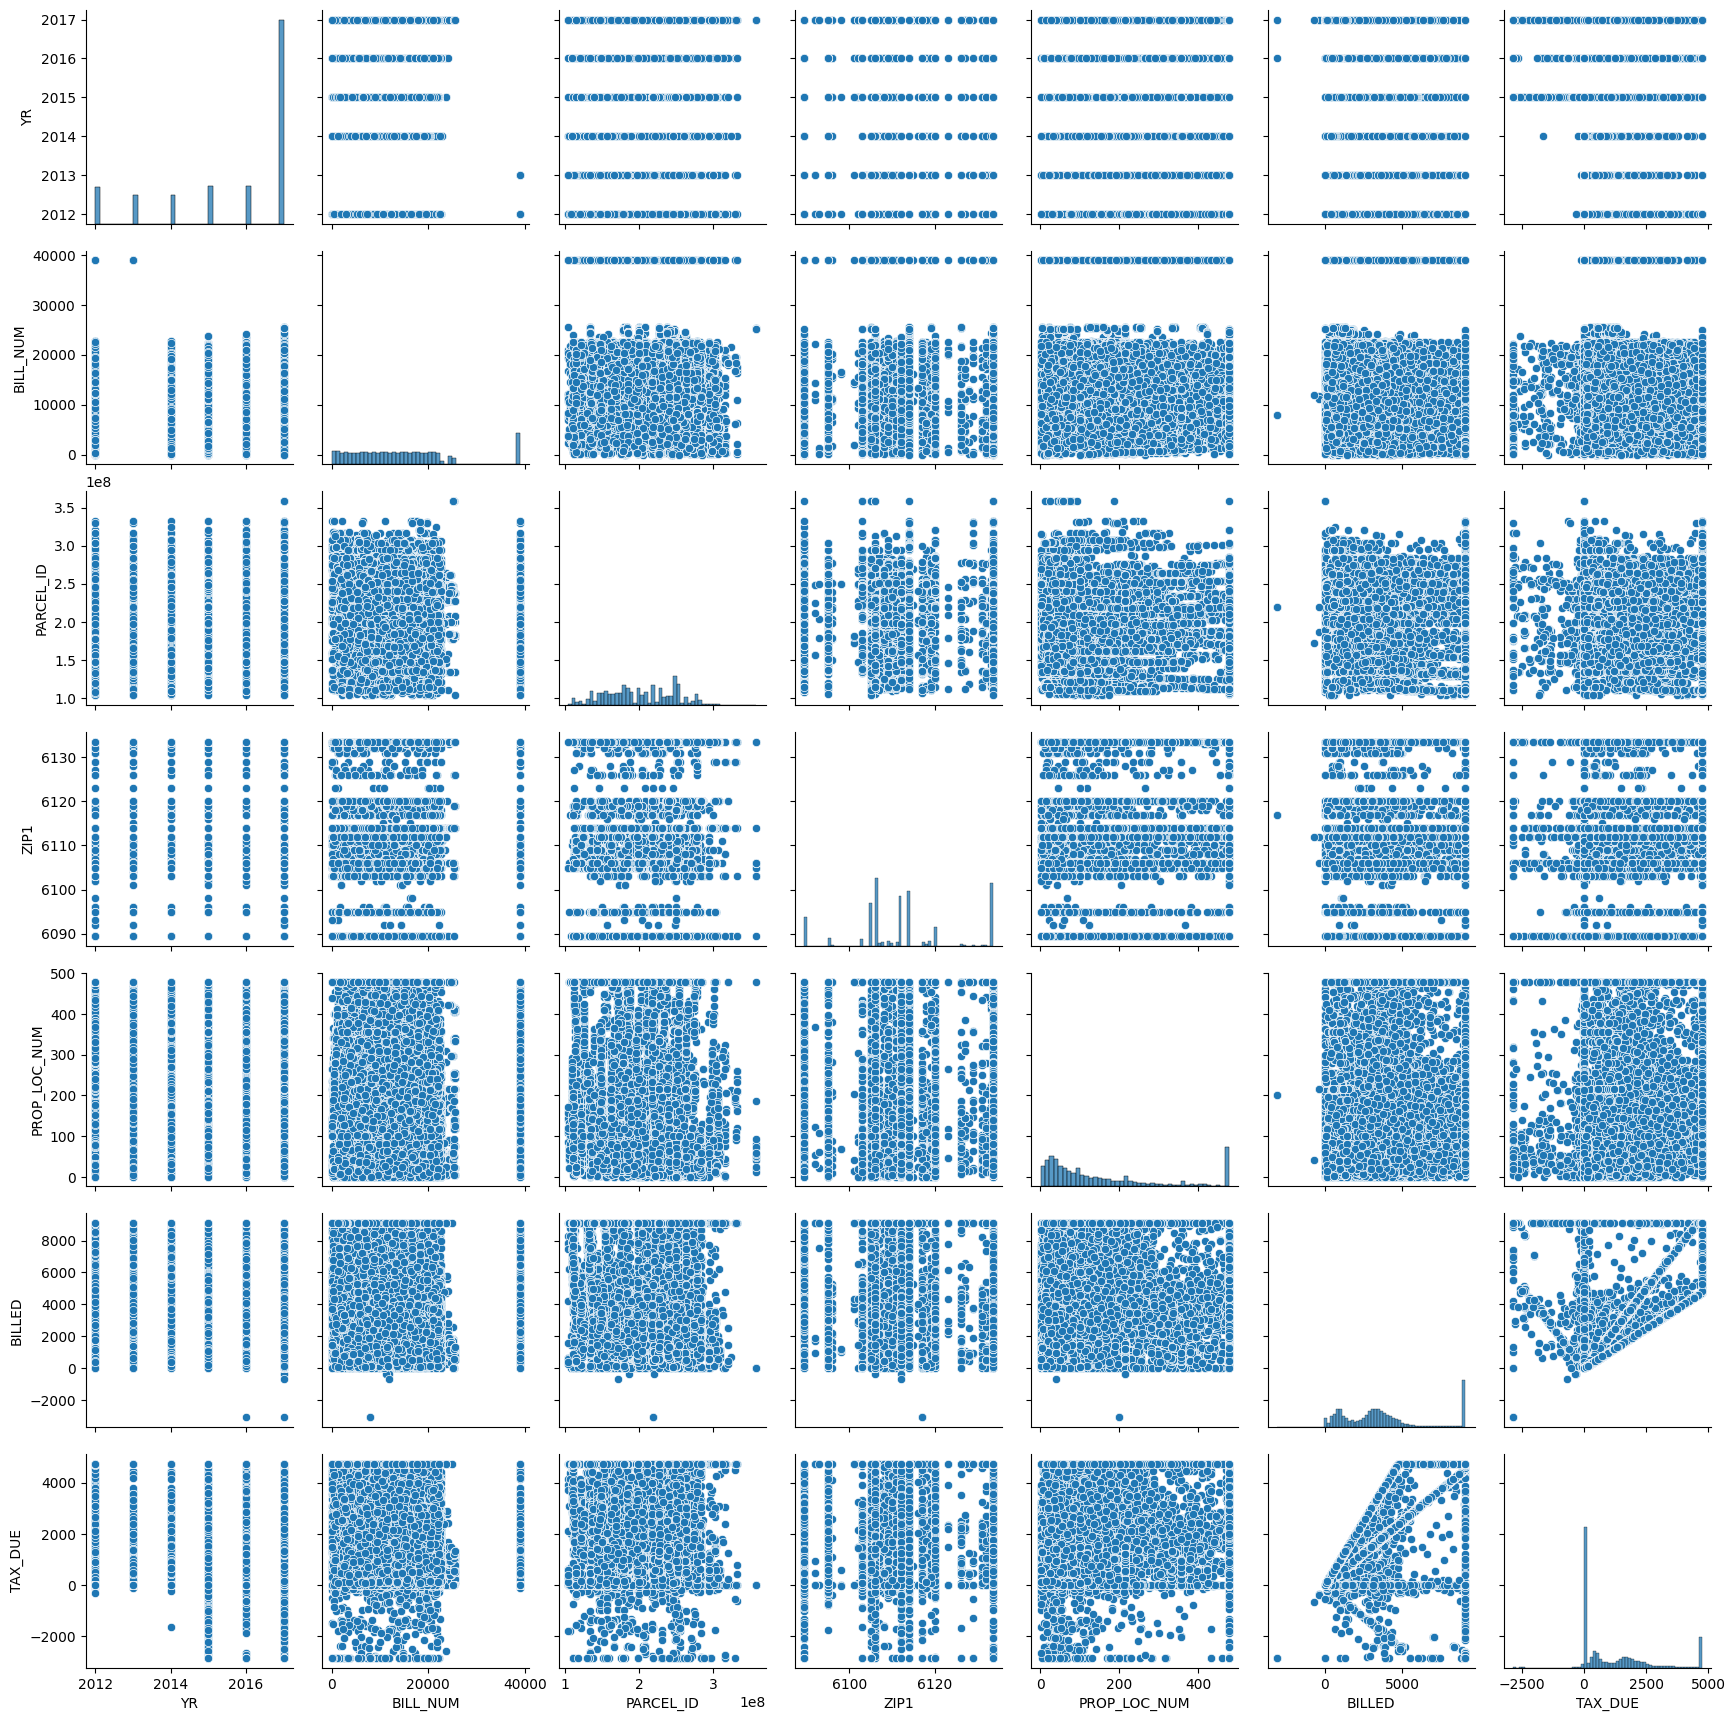

In [44]:
# pairplot - To visualize relationship between multiple pairs of variables
sns.pairplot(df1)

* The diagonal represents histograms of individual variables, showing their distribution.
* YR (year) variable shows a high concentration around 2016, with a sharp peak.
* The triangular pattern, indicating that higher values of BILLED correspond to higher values of TAX_DUE.
* Many of the scatter plots are dense, because of discrete values or categorical data in the dataset.

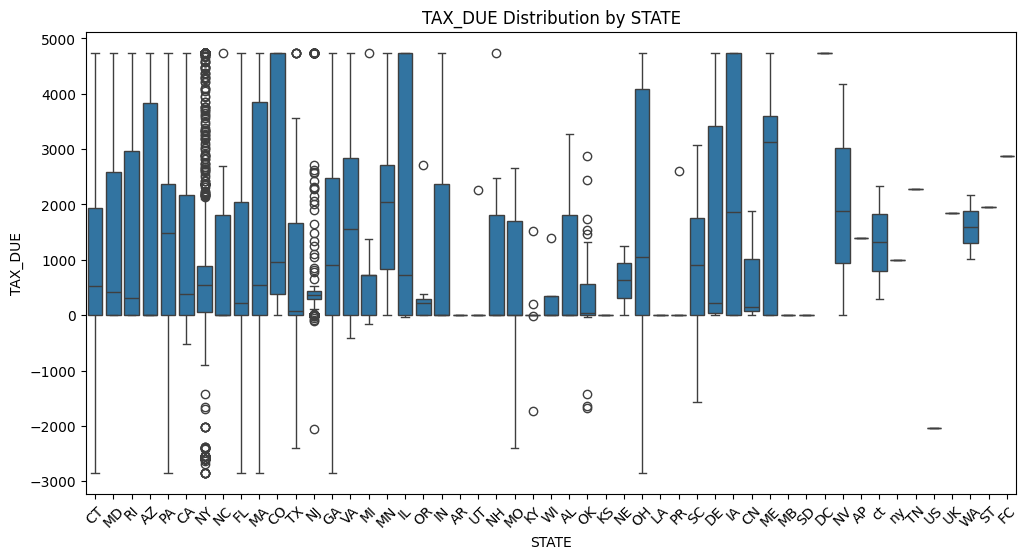

In [45]:
# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE', y='TAX_DUE', data=df1)
plt.xticks(rotation=45)
plt.title('TAX_DUE Distribution by STATE')
plt.show()

* This visualization highlights the variation in tax dues across different states.
* states are listed in an abbreviated form (e.g., CT, MD, AZ, PA, etc.).
* There are several states with a wide range of TAX_DUE values, such as CA, FL, and IA.
* Some states show negative tax dues, indicating instances where people received refunds or had no tax due, such as GA and MO.
* Certain states have more centralized distributions, indicating less variation in TAX_DUE, such as NJ and NH.

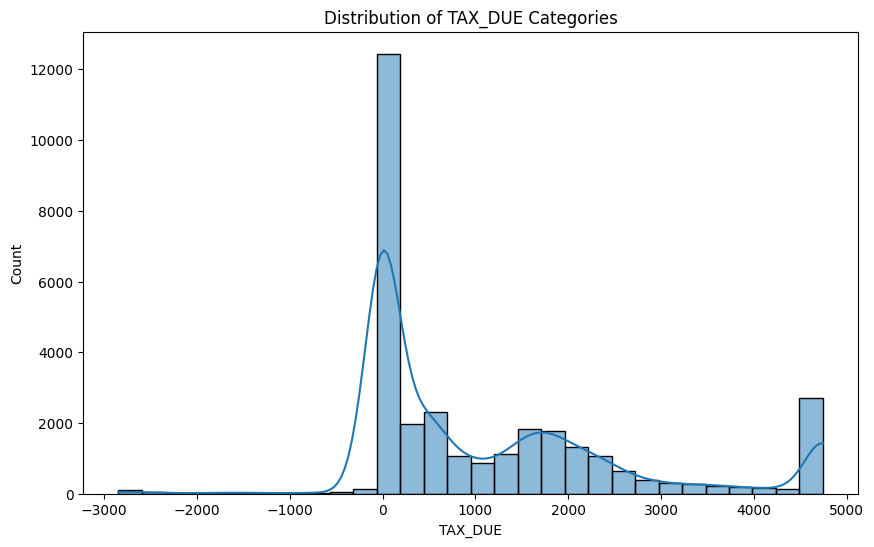

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df1['TAX_DUE'], bins=30, kde=True)
plt.title('Distribution of TAX_DUE Categories')
plt.xlabel('TAX_DUE')
plt.ylabel('Count')
plt.show()

* values like 1000, 2000, and 3000, representing smaller groups of taxpayers with moderate dues.
* a small number of isolated points at much higher values, such as 4000 and beyond, indicating the relatively rare instances of significantly higher      tax dues.

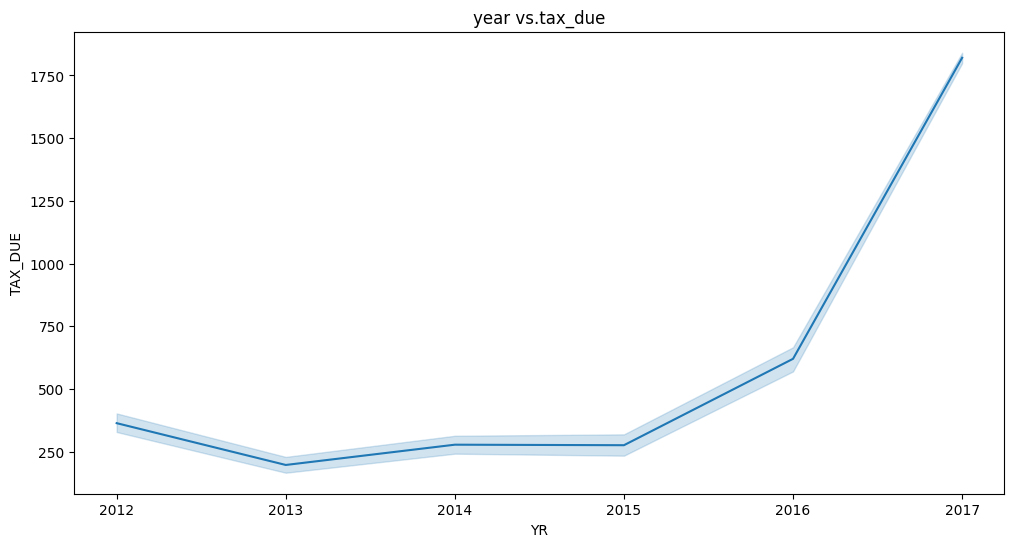

In [47]:
# Line Plots (for time-series data, if applicable)
plt.figure(figsize=(12, 6))
sns.lineplot(x='YR', y='TAX_DUE', data=df1)
plt.title('year vs.tax_due')
plt.show()

#### The trend in the line plot of Year vs. Tax Due shows two distinct phases:

* 2012 to 2014: During this period, the tax due remains relatively stable, fluctuating between 800 and 1000. This could indicate consistent property   values or tax rates, with no significant economic changes impacting tax dues.
* 2014-2015: Tax due is slightly decreases upto below 800. This may indicate the lower property values at that time.

* 2015 to 2017: From 2015 onwards, there is a noticeable increase, with tax dues rising to between 1200 and 1600. This suggests a shift, possibly due to rising property values, tax policy changes, or other economic factors.

The sharp increase in tax due after 2015 indicates an external influence, such as market changes or revised tax regulations.

<Axes: >

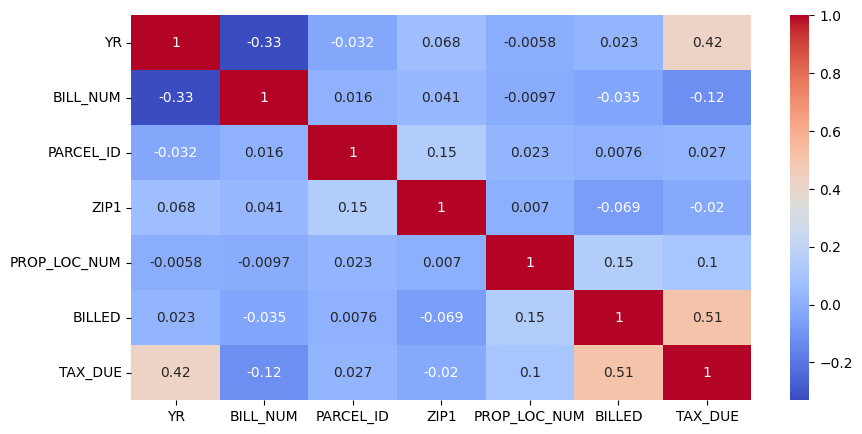

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(df1[numeric_columns].corr(),annot=True, cmap = 'coolwarm')

## 8. Feature Engineering

#### Encode categorical features to numerical using techniques like label encoding to prepare thedata for machine learning algorithms. Use Label encoding for ordinal data.

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31290 entries, 0 to 136044
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YR             31290 non-null  float64
 1   BILL_NUM       31290 non-null  float64
 2   PARCEL_ID      31290 non-null  float64
 3   TXPR_NAME      31290 non-null  object 
 4   MAIL_ADDR      31290 non-null  object 
 5   CITY           31290 non-null  object 
 6   STATE          31290 non-null  object 
 7   ZIP1           31290 non-null  float64
 8   PROP_LOC_NUM   31290 non-null  float64
 9   PROP_LOC_NAME  31290 non-null  object 
 10  BILLED         31290 non-null  float64
 11  TAX_DUE        31290 non-null  float64
dtypes: float64(7), object(5)
memory usage: 3.1+ MB


In [50]:
# Perform label encoding on the feature columns
#drop_first=True: This parameter is set to True to drop the first level for each categorical variable after encoding. 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of columns to apply label encoding
columns_to_encode = ['TXPR_NAME', 'MAIL_ADDR', 'CITY', 'STATE', 'PROP_LOC_NAME']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each specified column
for column in columns_to_encode:
    df1[column] = label_encoder.fit_transform(df1[column].astype(str))

# Display the first few rows of the DataFrame
print(df1.head())

        YR  BILL_NUM    PARCEL_ID  TXPR_NAME  MAIL_ADDR  CITY  STATE    ZIP1  \
0   2012.0   12351.0  264169027.0       7957       6737   232      7  6120.0   
3   2012.0    2671.0  284074072.0       1970       7618   232      7  6120.0   
10  2012.0   20736.0  170029174.0      13507      10640   232      7  6112.0   
11  2012.0   15616.0  240119104.0      10104       1381   232      7  6120.0   
15  2012.0   13822.0  219211011.0       8843      13262   232      7  6105.0   

    PROP_LOC_NUM  PROP_LOC_NAME   BILLED  TAX_DUE  
0          303.0             71   891.34   829.16  
3          477.5            677  2373.16   456.76  
10         477.5             80  1107.44   687.36  
11         120.0            170   550.56     9.88  
15         166.0            784  2799.58    56.41  


### Scaling using StandardScaler

In [51]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df1.drop(columns=['TAX_DUE'])  # Features (all columns except target)
y = df1['TAX_DUE']                   # Target variable
X_scaled = scaler.fit_transform(X)
# Convert the result back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,YR,BILL_NUM,PARCEL_ID,TXPR_NAME,MAIL_ADDR,CITY,STATE,ZIP1,PROP_LOC_NUM,PROP_LOC_NAME,BILLED
0,-2.089695,-0.171237,1.366996,0.252681,-0.111442,-0.236635,-0.367507,0.629204,0.999696,-1.401007,-1.045644
1,-2.089695,-1.128293,1.798162,-1.104619,0.105940,-0.236635,-0.367507,0.629204,2.177078,0.177340,-0.486472
2,-2.089695,0.657782,-0.672181,1.510909,0.851600,-0.236635,-0.367507,-0.035031,2.177078,-1.377566,-0.964098
3,-2.089695,0.151571,0.846047,0.739422,-1.433003,-0.236635,-0.367507,0.629204,-0.235038,-1.143158,-1.174239
4,-2.089695,-0.025801,0.393154,0.453544,1.498564,-0.236635,-0.367507,-0.616236,0.075332,0.456026,-0.325561
...,...,...,...,...,...,...,...,...,...,...,...
31285,0.751568,-0.704440,-0.649115,-0.740526,0.414123,-0.236635,-0.367507,-0.035031,1.849840,-1.374962,-0.905140
31286,0.751568,1.116931,0.573657,1.625623,0.615713,-1.387562,-0.367507,1.750100,0.405944,1.198318,-0.923110
31287,0.751568,0.220384,-1.170628,-0.967461,0.099031,2.673565,2.728692,1.750100,0.041596,-0.208131,-0.403537
31288,0.751568,-0.296604,-0.173415,-0.070831,-1.541324,0.832082,2.728692,1.750100,-0.862526,1.888519,-0.554298


## 9. Data Splitting

In [52]:
#Splitting the dataset into 80-20, that is, 80% of the data is for training and 20% of the data is for testing.
import pandas as pd
from sklearn.model_selection import train_test_split
# Define your features (X) and target variable (y)
X = df1.drop(columns=['TAX_DUE'])  # Features (all columns except target)
y = df1['TAX_DUE']                   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (25032, 11)
X_test shape: (6258, 11)
y_train shape: (25032,)
y_test shape: (6258,)


## 10.Model Selection

### Models Selected:
* LinearRegression,
* DecisionTreeRegressor,
* ExtraTreeRegressor,
* RandomForestRegressor,
* GradientBoostingRegressorssor.

## 11. Model Training & Evaluation

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize lists to store model metrics
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

# List of models to evaluate
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Loop through each model, fit, and evaluate
for model in models:
    model.fit(X_train, y_train)  # Ensure you use 'X_train' here
    
    prediction = model.predict(X_test)  # Use 'X_test' for predictions
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(mean_squared_error(y_test, prediction, squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    R2_score.append(r2_score(y_test, prediction))

In [54]:
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,751.943580,5.654191e+05,364.185308,0.752766
GradientBoostingRegressor,845.657997,7.151374e+05,433.929410,0.687300
DecisionTreeRegressor,1091.775967,1.191975e+06,422.161624,0.478799
LinearRegression,1119.663052,1.253645e+06,807.318002,0.451833
ExtraTreeRegressor,1153.728591,1.331090e+06,475.338661,0.417970


### 1. RandomForestRegressor:
#### Best overall performance with an R² Score 0.75
### 2.GradientBoostingRegressor:
#### Second best in terms of R² Score (0.68) indicating good performance ,but less than RandomForest.
### 3.LinearRegression :
#### R² Score of 0.47, showing slightly worse performance compared to Decisiontreeregressor.
### 4. DecisionTreeRegressor and 5.ExtraTreeRegressor :
#### Similar performance to LinearRegression with R² Score of 0.45 and 0.41.

## 12. Feature Selection And 13.Model Evaluation

### 1. SelecKBbest

In [55]:
from sklearn.feature_selection import SelectKBest, f_regression
# Apply SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=10)
x_train_kbest = selector_kbest.fit_transform(X_train, y_train)
x_test_kbest = selector_kbest.transform(X_test)

# Get the names of the selected features
selected_indices_kbest = selector_kbest.get_support(indices=True)
selected_features_kbest = X_train.columns[selected_indices_kbest]
print("Selected features using SelectKBest:", selected_features_kbest)

# Initialize lists to store results
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

# List of models to train
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(x_train_kbest, y_train)
    prediction = model.predict(x_test_kbest)
    
    model_name.append(model.__class__.__name__)
    RMSE.append(mean_squared_error(y_test, prediction, squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    R2_score.append(r2_score(y_test, prediction))

# Create a DataFrame to display the results
models_df1_kbest = pd.DataFrame({"Model-Name": model_name, "RMSE": RMSE, "MSE": MSE, "MAE": MAE, "R2_Score": R2_score})
models_df1_kbest = models_df1_kbest.set_index('Model-Name')
models_d1f_kbest = models_df1_kbest.sort_values("R2_Score", ascending=False)

# Print the results
print("Results using SelectKBest:")
print(models_df1_kbest)

Selected features using SelectKBest: Index(['YR', 'BILL_NUM', 'PARCEL_ID', 'TXPR_NAME', 'CITY', 'STATE', 'ZIP1',
       'PROP_LOC_NUM', 'PROP_LOC_NAME', 'BILLED'],
      dtype='object')
Results using SelectKBest:
                                  RMSE           MSE         MAE  R2_Score
Model-Name                                                                
LinearRegression           1119.639431  1.253592e+06  807.234087  0.451856
DecisionTreeRegressor      1116.156427  1.245805e+06  425.789343  0.455261
ExtraTreeRegressor         1159.728032  1.344969e+06  473.694727  0.411901
RandomForestRegressor       755.969154  5.714894e+05  367.248136  0.750111
GradientBoostingRegressor   846.965975  7.173514e+05  431.442868  0.686332


####  'YR', 'BILL_NUM', 'PARCEL_ID', 'TXPR_NAME', 'CITY', 'STATE', 'ZIP1', 'PROP_LOC_NUM', 'PROP_LOC_NAME', 'BILLED are the selected features using selektbest and the Random forest regressor performs well with R2 score of 0.75.'

### 2.SelectFromModel with Lasso

In [56]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Apply SelectFromModel with Lasso
lasso = Lasso(alpha=0.1)
selector_lasso = SelectFromModel(lasso)
selector_lasso.fit(X_train, y_train)

# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)

# Get the names of the selected features
selected_features_lasso = X_train.columns[selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)

# Use the selected features to train and evaluate the models
x_train_lasso = X_train[selected_features_lasso]
x_test_lasso = X_test[selected_features_lasso]

# Initialize lists to store results
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

# Train and evaluate each model
for model in models:
    model.fit(x_train_lasso, y_train)
    prediction = model.predict(x_test_lasso)
    
    model_name.append(model.__class__.__name__)
    RMSE.append(mean_squared_error(y_test, prediction, squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    R2_score.append(r2_score(y_test, prediction))

# Create a DataFrame to display the results
models_df1_lasso = pd.DataFrame({"Model-Name": model_name, "RMSE": RMSE, "MSE": MSE, "MAE": MAE, "R2_Score": R2_score})
models_df1_lasso = models_df1_lasso.set_index('Model-Name')
models_df1_lasso = models_df1_lasso.sort_values("R2_Score", ascending=False)

# Print the results
print("Results using SelectFromModel with Lasso:")
print(models_df1_lasso)

Selected features using SelectFromModel with Lasso: Index(['YR', 'BILL_NUM', 'PARCEL_ID', 'TXPR_NAME', 'MAIL_ADDR', 'CITY',
       'STATE', 'ZIP1', 'PROP_LOC_NUM', 'PROP_LOC_NAME', 'BILLED'],
      dtype='object')
Results using SelectFromModel with Lasso:
                                  RMSE           MSE         MAE  R2_Score
Model-Name                                                                
RandomForestRegressor       754.485684  5.692486e+05  364.335508  0.751091
GradientBoostingRegressor   845.679676  7.151741e+05  434.009592  0.687284
DecisionTreeRegressor      1084.075826  1.175220e+06  421.459466  0.486125
LinearRegression           1119.663052  1.253645e+06  807.318002  0.451833
ExtraTreeRegressor         1137.548614  1.294017e+06  454.052400  0.434180


#### 'YR', 'BILL_NUM', 'PARCEL_ID', 'TXPR_NAME', 'MAIL_ADDR', 'CITY',  'STATE', 'ZIP1', 'PROP_LOC_NUM', 'PROP_LOC_NAME', 'BILLED are the selected features using SelectFromModel with Lasso and the Random forest regressor performs well with R2 score of 0.75.'

### 3.Select features using Variance Threshold

In [57]:
from sklearn.feature_selection import VarianceThreshold

# Apply Variance Threshold
threshold = 0.1  # Set a variance threshold
selector_variance = VarianceThreshold(threshold=threshold)
x_train_variance = selector_variance.fit_transform(X_train)
x_test_variance = selector_variance.transform(X_test)

# Get the selected feature indices
selected_indices_variance = selector_variance.get_support(indices=True)
selected_features_variance = X_train.columns[selected_indices_variance]
print("Selected features using Variance Threshold:", selected_features_variance)

# Initialize lists to store results
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

# List of models to train
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(x_train_variance, y_train)
    prediction = model.predict(x_test_variance)
    
    model_name.append(model.__class__.__name__)
    RMSE.append(mean_squared_error(y_test, prediction, squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    R2_score.append(r2_score(y_test, prediction))

# Create a DataFrame to display the results
models_df1_variance = pd.DataFrame({
    "Model-Name": model_name,
    "RMSE": RMSE,
    "MSE": MSE,
    "MAE": MAE,
    "R2_Score": R2_score
})
models_df1_variance = models_df1_variance.set_index('Model-Name')
models_df1_variance = models_df1_variance.sort_values("R2_Score", ascending=False)

Selected features using Variance Threshold: Index(['YR', 'BILL_NUM', 'PARCEL_ID', 'TXPR_NAME', 'MAIL_ADDR', 'CITY',
       'STATE', 'ZIP1', 'PROP_LOC_NUM', 'PROP_LOC_NAME', 'BILLED'],
      dtype='object')


In [58]:
# Print results
print("Results using SelectKBest:")
print(models_df1_kbest)

print("\nResults using SelectFromModel with Lasso:")
print(models_df1_lasso)

print("\nResults using Variance Threshold:")
print(models_df1_variance)

Results using SelectKBest:
                                  RMSE           MSE         MAE  R2_Score
Model-Name                                                                
LinearRegression           1119.639431  1.253592e+06  807.234087  0.451856
DecisionTreeRegressor      1116.156427  1.245805e+06  425.789343  0.455261
ExtraTreeRegressor         1159.728032  1.344969e+06  473.694727  0.411901
RandomForestRegressor       755.969154  5.714894e+05  367.248136  0.750111
GradientBoostingRegressor   846.965975  7.173514e+05  431.442868  0.686332

Results using SelectFromModel with Lasso:
                                  RMSE           MSE         MAE  R2_Score
Model-Name                                                                
RandomForestRegressor       754.485684  5.692486e+05  364.335508  0.751091
GradientBoostingRegressor   845.679676  7.151741e+05  434.009592  0.687284
DecisionTreeRegressor      1084.075826  1.175220e+06  421.459466  0.486125
LinearRegression           111

### Random Forest Feature Importance Analysis

Top 10 Important Features:
          Feature  Importance
10         BILLED    0.444889
0              YR    0.240959
2       PARCEL_ID    0.069107
4       MAIL_ADDR    0.047579
3       TXPR_NAME    0.045028
9   PROP_LOC_NAME    0.039130
8    PROP_LOC_NUM    0.038547
1        BILL_NUM    0.030690
5            CITY    0.020678
7            ZIP1    0.015779


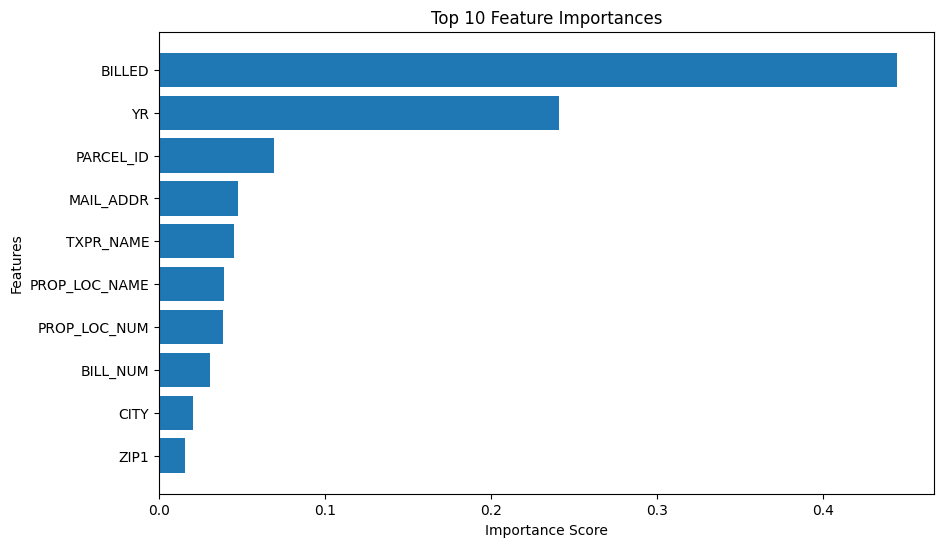

In [59]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Initialize the RandomForestRegressor with our preferred parameters
rf_model = RandomForestRegressor()

# Train the model on your training data
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df1 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
top_features = feature_importance_df1.head(10)
print("Top 10 Important Features:")
print(top_features)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], align='center')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

* #### BILLED(44.48% feature importance):Most crucial factor in predicting residential tax due.
* #### YR(24.09% feature importance):Second most influential feature.
* #### However other features are contributing small influence in prediction

## 14.Hyperparameter Tuning

In [60]:
# tunning the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=120)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9629652185064264

In [61]:
# Define parameter grid for Random Forest Regressor
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train_kbest, y_train)

# Get the best model from grid search
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(x_test_kbest)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Best Parameters:", grid_search_rf.best_params_)
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    "Model-Name": ["RandomForestRegressor"],
    "RMSE": [rmse],
    "MSE": [mse],
    "MAE": [mae],
    "R2 Score": [r2]
})

results_df.set_index('Model-Name', inplace=True)
print(results_df)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 753.107906750816
MSE: 567171.5192105959
MAE: 367.7914957247226
R2 Score: 0.7519994848894083
                             RMSE            MSE         MAE  R2 Score
Model-Name                                                            
RandomForestRegressor  753.107907  567171.519211  367.791496  0.751999


### The RandomForestRegressor model performs well on my dataset, as indicated by the high R2 score (0.75). This suggests that the model captures a significant amount of variability in the target variable.This R² score suggests that the model explains approximately 75.2% of the variance in the target variable, indicating a good fit

## 15.Model Deployment

In [62]:
import joblib
import os

# Assuming best_rf_model contains your trained Random Forest Regressor model
best_model = best_rf_model  # Replace 'best_rf_model' with your RandomForestRegressor instance

# Define the filename to save the model
filename = 'random_forest_regressor_model.joblib'

# Save the model using joblib
joblib.dump(best_model, filename)
print("Model saved successfully.")

# Check if the model file exists
if os.path.isfile(filename):
    print("Model file exists.")
else:
    print("Model file does not exist.")

# Load the model from the file using joblib
loaded_model = joblib.load(filename)
print("Model loaded successfully.")

Model saved successfully.
Model file exists.
Model loaded successfully.


## 16.Test with unseen data

In [88]:
new_data = X_test[['YR', 'BILL_NUM', 'PARCEL_ID', 'TXPR_NAME', 'MAIL_ADDR', 'CITY', 'ZIP1', 'PROP_LOC_NUM', 'PROP_LOC_NAME', 'BILLED']]
# Predict on unseen data
predictions = best_model.predict(new_data)
print('Predictions on unseen data:', predictions)

Predictions on unseen data: [2578.7797103   535.02529611   25.3912416  ...   29.14856419   17.62238106
 2156.03032086]


#### The predictions on unseen data show a broad range of tax dues, from around 17.62 to 2578.78. This variation suggests that the model is distinguishing between cases with high, moderate, and minimal tax dues, likely influenced by key features in the dataset like property value and location. Higher values (e.g., 2578.78, 2156.03) may correspond to properties with significant tax liabilities, while lower values (e.g., 25.39, 17.62) could represent low-assessment properties or cases with deductions.

## 17.Interpretation of Results:
* #### Features such as 'YR','BILLED' were found to be significant contributors to the prediction of residential tax_due.
* #### we can say that Year of the property tax payment and The amount billed for taxes are the factors significantly affect the tax due of the property.
* #### other features are showing less impact on tax due prediction 

## Conclusion

### In this project, I aimed to predict residential tax due using a diverse dataset containing various features. Through meticulous data preprocessing, feature engineering, and model selection, I was able to develop and evaluate multiple regression models.

## 18. Limitations:

* most of the features doesn't provide any significant connection with the target variable
* The model performance is sufficient but cannot say it as a perfect one.
* Challenges: we encountered limitations such as data quality issues, potential feature correlation, and the absence of external factors that could influence residential tax.
* Feature Importance: Features such as 'YR','BILLED' were found to be significant contributors to the prediction of residential tax_due.
* Had to reduce the dataset size to eliminate the problem of time taken for model training and imbalanced data ('0' values in the target variable)

## 19.Future Work:

### To enhance the predictive performance and reliability of our model, future efforts could focus on:

* Consider adding more features to enhance predictive power
* Addresss imbalanced data through resampling techniques.
* Collect and integrate more diverse and updated data.
* Explore advanced machine learning techniques and model ensembling.